# Activity Classification - DNN2 Training

This notebook trains our second Deep Neural Network on the physical activity dataset.


## Load Data and Prepare Training Set

In [19]:
%reset -f

import importlib
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import activity_functions
importlib.reload(activity_functions)

from activity_functions import *

In [20]:
activtity = load_data()

Loaded from Kaggle: /home/thuy/.cache/kagglehub/datasets/diegosilvadefrana/fisical-activity-dataset/versions/4/dataset2.csv


In [21]:
df_train, df_test = create_train_test(activtity, test_ratio=0.2)

In [22]:
X_train, y_train, X_test, y_test = prepare_for_train(df_train, df_test)

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

## Train

In [24]:
model = final_build_dnn2()

## Model Summary

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 35, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 35, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 17, 128)        │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 64)          │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 262,445 (1.00 MB)

 Trainable params: 262,445 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

## Model History

In [26]:
history = model.fit(
    X_train,
    y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=100,
    batch_size=1024,
    verbose=1
)

Epoch 1/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 283s 125ms/step - accuracy: 0.8854 - loss: 0.4050 - val_accuracy: 0.9407 - val_loss: 0.2284
Epoch 2/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 300s 116ms/step - accuracy: 0.9470 - loss: 0.2056 - val_accuracy: 0.9588 - val_loss: 0.1715
Epoch 3/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 293s 130ms/step - accuracy: 0.9619 - loss: 0.1612 - val_accuracy: 0.9726 - val_loss: 0.1315
Epoch 4/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 298s 119ms/step - accuracy: 0.9694 - loss: 0.1398 - val_accuracy: 0.9758 - val_loss: 0.1214
Epoch 5/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 271s 121ms/step - accuracy: 0.9737 - loss: 0.1270 - val_accuracy: 0.9789 - val_loss: 0.1126
Epoch 6/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 368s 142ms/step - accuracy: 0.9764 - loss: 0.1194 - val_accuracy: 0.9815 - val_loss: 0.1054
Epoch 7/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 318s 142ms/step - accuracy: 0.9781 - loss: 0.1139 - val_accuracy: 0.9837 - val_loss: 0.0987
Epoch 8/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 267s 118ms/s

#### Accuracy Plot

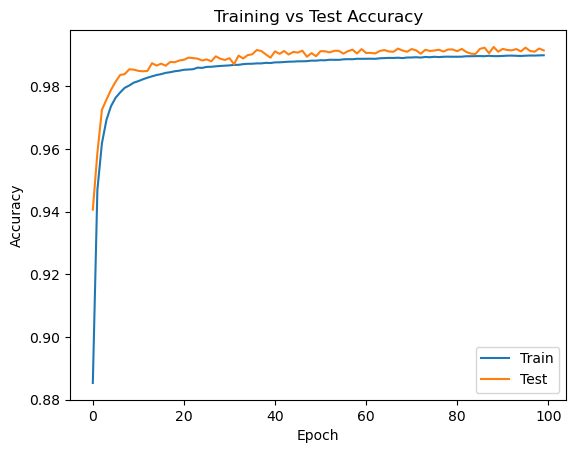

In [27]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy")
plt.legend(["Train", "Test"])
plt.show()

#### Loss Plot

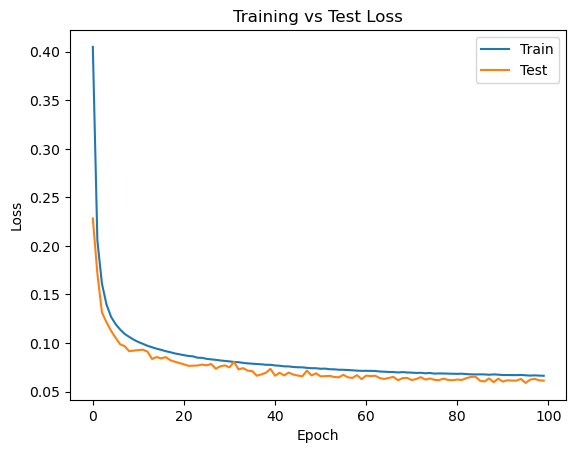

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Test Loss")
plt.legend(["Train", "Test"])
plt.show()


## Model Evaluation

In [30]:
y_test_hat = model.predict(X_test)
y_test_pred = np.argmax(y_test_hat, axis=1)
compute_scores(y_test_encoded, y_test_pred, verbose=True)

17901/17901 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step
Accuracy:  0.9915
F1-Score:  0.9916
Recall:    0.9936
Precision: 0.9896


,Accuracy,F1_Score,Recall,Precision
0,0.991495,0.991608,0.993602,0.989643
